**Download** (right-click, save target as ...) this page as a Jupyterlab notebook from: [ES-1](http://54.243.252.9/ce-5319-webroot/2-Exercises/ES-1/ES1.ipynb)

___

# <font color=darkblue>CE 5319 Machine Learning for Civil Engineers <br> Fall 2022 Exercise Set 1</font>

**Kat, Neko**

**R12345678**

___

### Purpose : 
Demonstrate ability to build simple (naive) prediction and classification engines using primative python.
 
### Assessment Criteria : 
Completion, results plausible, format correct, calculations (Jupyter Notebook) are shown.  
___

## Problem 1

Build a simple prediction engine for a dive computer device

![](http://54.243.252.9/ce-5319-webroot/2-Exercises/ES-1/TechDiving_NOAA.png)

| Diver with Computer |
|---|

### Background 
Scuba divers circa 1980's used to memorize dive tables which provided safe depth-duration combinations (e.g. 60 feet for 60 minutes).  Commerical divers used similar tables. A bounce would occur when a diver at depth notices a shiny object and descends deeper for a very short interval to recover the object - usually something worthless, but occassionally something very valuable. Bounce dives can be quite dangerous - more so if the diver is trying to adapt a memorized dive table to his/her current situation, hence the development of dive computers.

The US Navy started development of dive computers in the 1950's to relieve the human of the somewhat tricky task of multi-level dive planning and monitoring. The first digital dive computer was a laboratory model, the XDC-1, based on a desktop electronic calculator, converted to run a DCIEM four-tissue algorithm in 1975. It used pneumofathometer depth input from surface-air supplied divers. 

In 1976 the diving equipment company Dacor developed and marketed a digital dive computer which used a **table lookup** based on stored US Navy tables rather than a real-time tissue gas saturation model. The Dacor Dive Computer (DDC), displayed output on light-emitting diodes for: current depth; elapsed dive time; surface interval; maximum depth of the dive; repetitive dive data; ascent rate, with a warning for exceeding 20 metres per minute; warning when no-decompression limit is reached; battery low warning light; and required decompression. 

In the subsequent decade several firms developed and marketed dive computers; by 1989, the advent of dive computers had not met with what might be considered widespread acceptance. Combined with the general mistrust, at the time, of taking a piece of electronics that your life might depend upon underwater, there were also objections expressed ranging from dive resorts believing that the increased bottom time would upset their boat and meal schedules, to that of experienced divers who felt that the increased bottom time would, regardless of the claims, result in many more cases of decompression sickness.

By 2015 sophisticated dive computers using real-time tissue gas saturation models were commonplace and comparatively inexpensive (circa 2020 computers are programmable for exotic gasses - greatly relieving the diver's workload in planning and monitoring multi-level (bounce) dives).

![](http://54.243.252.9/ce-5319-webroot/2-Exercises/ES-1/HELOX.png)

|Helium-Oxygen Dive Computer Readout|
|---|

### Problem Statement

Using the data below develop a prediction for a dive computer that uses Dacor's original approach (i.e. table lookup in this case replaced by an data model). The table lists allowable time at prescribed depths for a recreational diver with a safety decompression stop at 10 feet depth.

![](http://54.243.252.9/ce-5319-webroot/2-Exercises/ES-1/DiveTable.png)

<!--|Depth (feet)|Time (minutes) with Safety Stop|Time (minutes) without Safety Stop|
|---|---|---|
35 |205|139|
40 |140|104|
50 |80|63|
60 |55|47|
70 |45|33|
80 |35|25|
90 |25|21|
100 |22|none|
110 | 16|none|
120| 13|none|
130| 10|none|
140| 8|none|-->

In the context of ML the supplied table is the "truth table" and initially our goal is to fit some kind of hypothesis to this table.  Avoid the temptation to just apply linear regression and instead mimic the naive learner in the class notes.

Consider the two hypothesis structures below and decide which produces a more useful model.

1. $\text{Time} = \beta_{0}+\beta_{1}*\text{Depth}$
2. $\text{Time} = \beta_{0}+\beta_{1}*log_{10}(\text{Depth}+\beta_{3})$


Summarize your efforts into a brief blog-post type of report (i.e. in a Jupyter Notebook)

One possible approach using the simple prediction example in the overview chapter.

First we need to build our dataframe.

In [5]:
# This is a small problem
# We Need a  dataframe - we can hardcode them here
dataframe1 = [[35 ,205,139],[40 ,140,104],[50 ,80,63],[60 ,55,47],[70 ,45,33],[80 ,35,25],[90 ,25,21],[100 ,22,0],[110 , 16,0],[120, 13,0],[130, 10,0],[140, 8,0]]
dataframe1[0][2]

139

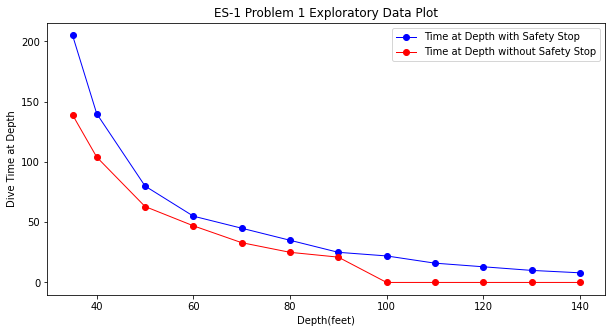

[35, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

In [20]:
# Now some plotting of the dataframes
import matplotlib.pyplot as plt # the python plotting library
# build plot series
series1 = []
series2 = []
series3 = []
for irow in range(len(dataframe1)):
    series1.append(dataframe1[irow][0])
    series2.append(dataframe1[irow][1])
    series3.append(dataframe1[irow][2])
# now a plot
plottitle ='ES-1 Problem 1 Exploratory Data Plot' 
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(series1, series2, c='blue',linewidth=1,marker='o') 
plt.plot(series1, series3, c='red',linewidth=1,marker='o')
plt.xlabel('Depth(feet)')
plt.ylabel('Dive Time at Depth')
plt.legend(['Time at Depth with Safety Stop','Time at Depth without Safety Stop'])
plt.title(plottitle)
plt.show()

From the plot, there is curvature so the linear models are not anticipated to be great, but they are a start.  In any case at small values of depth the time is large, and decreasing as depth increases so we expect negative values for slope.  

Let's just naively proceed forward.  We need our hypothesis functions:

In [37]:
import math

def timelin(depth,beta0,beta1):
    timelin = beta0 + beta1*depth
    return(timelin)

def timelog(depth,beta0,beta1,beta2):
    timelog = beta0 + beta1*math.log10(depth+beta2)
    return(timelog)

Next lets just guess some values and see how they plot

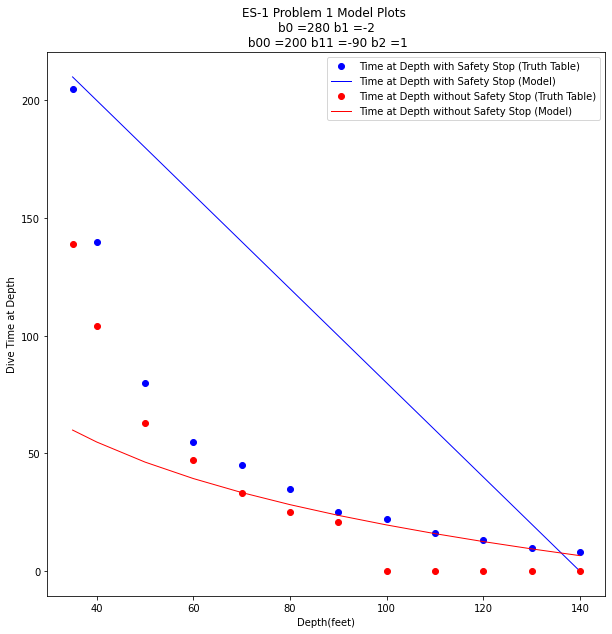

In [66]:
# guess some parameters
b0 = 280 # lin hypothesis
b00 = 200 # log hypothesis
b1 = -2 # lin hypothesis
b11 = -90 # log hypothesis
b2 = 1 # log hypothesis
# empty vectors for simulations
seriesP1 = []
seriesP2 = []
# current model
for irow in range(len(dataframe1)):
    seriesP1.append(timelin(dataframe1[irow][0],b0,b1))
    seriesP2.append(timelog(dataframe1[irow][0],b00,b11,b2))
# plot data and models same graff
plottitle ='ES-1 Problem 1 Model Plots \n' + 'b0 =' + str(b0) + ' b1 =' + str(b1) + '\n' + ' b00 =' + str(b00) + ' b11 =' + str(b11) + ' b2 =' + str(b2) 
mydata = plt.figure(figsize = (10,10)) # build a square drawing canvass from figure class
plt.plot(series1, series2, c='blue',linewidth=0,marker='o') 
plt.plot(series1, seriesP1, c='blue',linewidth=1) 
plt.plot(series1, series3, c='red',linewidth=0,marker='o')
plt.plot(series1, seriesP2, c='red',linewidth=1)
plt.xlabel('Depth(feet)')
plt.ylabel('Dive Time at Depth')
plt.legend(['Time at Depth with Safety Stop (Truth Table)','Time at Depth with Safety Stop (Model)','Time at Depth without Safety Stop (Truth Table)','Time at Depth without Safety Stop (Model)'])
plt.title(plottitle)
plt.show()  

So after some guessing, we can conclude that
- Our hypothesis models are crummy choices for trying to build a prediction engine
- Automated modeling might not do much better
- We have a workable structure for a learner, but we need a hypothesis that can deal better with the curvature in the truth table

Let's now automate a bit, one hypothesis at a time:

Search Complete - Error Value  14833.0
Combinations Examined :  4000
Beta 1  140
Beta 2  -1


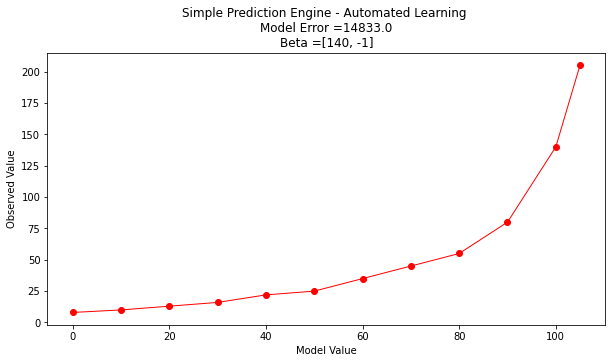

In [70]:
# identify, collect, load data
# Already did this 
# series1 is input
# series2 is response with safety stop
# series3 is response No safety stop

# a prediction engine structure (notice some logic to handle zeros)
def response(predictor1,beta1,beta2):
    response = beta1 + beta2*predictor1
    return(response)
# a measure of model quality
def quality(observed_list,model_list): 
    if len(observed_list) != len(model_list):
        raise Exception("List lengths incompatable")
    sse = 0.0
    howmany=len(observed_list)
    for i in range(howmany):
        sse=sse + (observed_list[i]-model_list[i])**2
    return(sse)
# define search region - in this case a bit more elaborate than the notes

index_list1 = [i for i in range(0,200,1)] # index list is 0.0,1.0,2.0,....
index_list2 = [i for i in range(-10,10,1)] # index list is -10.0,-9.0,-8.0,....,9.0,10.0

# Now some python trickery so we can reuse code without much thinking

output = series2 # this is an equivalence statement, different names same object

howmany = 0 # keep count of how many combinations
error   = 1e99          # a big value, we are trying to drive this to zero
xbest   = [0,-10] # variables to store our best solution parameters
modeloutput = [0 for i in range(len(output))] # space to store model responses


# perform a search - here we use nested repetition
for i1 in index_list1:
    for i2 in index_list2:
        howmany=howmany+1 # keep count of how many times we learn
        beta1 = i1 # this is the intercept
        beta2 = i2 # this is the slope
        for irow in range(len(output)): 
            modeloutput[irow]=response(series1[irow],beta1,beta2)
        guess = quality(output,modeloutput) # current model quality
 #               print(guess)
        if guess <= error:
            error = guess
            xbest[0]= beta1
            xbest[1]= beta2
print("Search Complete - Error Value ",round(error,8))
print("Combinations Examined : ",howmany)
print("Beta 1 ",xbest[0])
print("Beta 2 ",xbest[1])
for irow in range(len(output)): 
    modeloutput[irow]=response(series1[irow],xbest[0],xbest[1])

# now the plot
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Simple Prediction Engine - Automated Learning \n'
plottitle = plottitle + 'Model Error =' + repr(round(error,8)) + '\n'
plottitle = plottitle + 'Beta =' + repr(xbest)
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(modeloutput, output, c='red',linewidth=1,marker='o') 
#plt.plot(input2, output, c='blue',linewidth=0,marker='o')
#plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Model Value')
plt.ylabel('Observed Value')
#plt.legend(['Predictor 1','Predictor 2'])
plt.title(plottitle)
plt.show()
# 

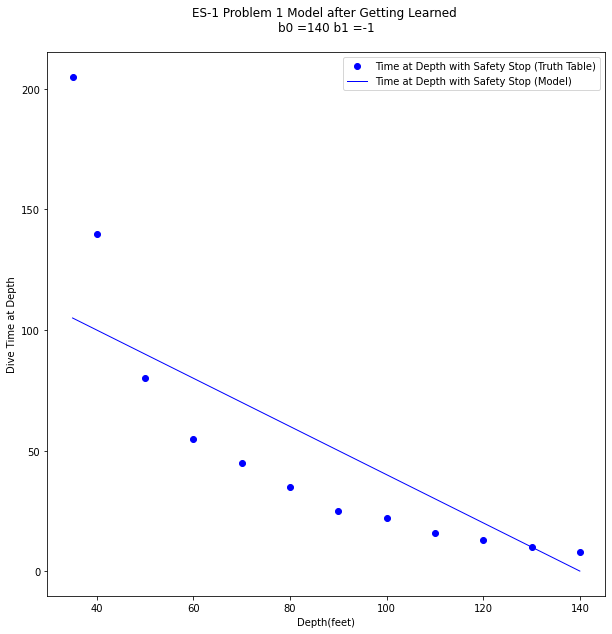

In [76]:
# empty vectors for simulations
seriesP1 = []
seriesP2 = []
# current model
for irow in range(len(dataframe1)):
    seriesP1.append(timelin(dataframe1[irow][0],xbest[0],xbest[1]))
    #seriesP2.append(timelog(dataframe1[irow][0],b00,b11,b2))
# plot data and models same graff
plottitle ='ES-1 Problem 1 Model after Getting Learned \n' + 'b0 =' + str(xbest[0]) + ' b1 =' + str(xbest[1]) + '\n' #+ ' b00 =' + str(b00) + ' b11 =' + str(b11) + ' b2 =' + str(b2) 
mydata = plt.figure(figsize = (10,10)) # build a square drawing canvass from figure class
plt.plot(series1, series2, c='blue',linewidth=0,marker='o') 
plt.plot(series1, seriesP1, c='blue',linewidth=1) 
#plt.plot(series1, series3, c='red',linewidth=0,marker='o')
#plt.plot(series1, seriesP2, c='red',linewidth=1)
plt.xlabel('Depth(feet)')
plt.ylabel('Dive Time at Depth')
plt.legend(['Time at Depth with Safety Stop (Truth Table)','Time at Depth with Safety Stop (Model)','Time at Depth without Safety Stop (Truth Table)','Time at Depth without Safety Stop (Model)'])
plt.title(plottitle)
plt.show()  

Search Complete - Error Value  20883.70290031
Combinations Examined :  40000
Beta 1  55
Beta 2  -10
Beta 3  -5


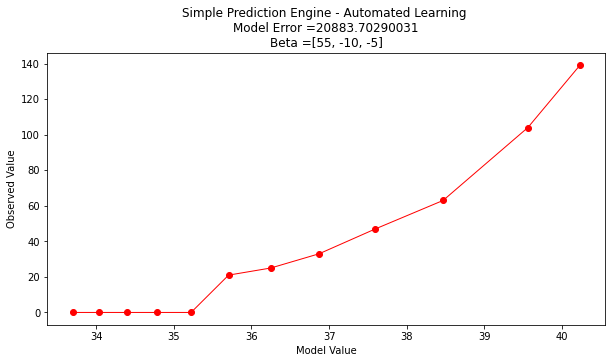

In [84]:
# identify, collect, load data
# Already did this 
# series1 is input
# series2 is response with safety stop
# series3 is response No safety stop

# a prediction engine structure (notice some logic to handle zeros)
def response(predictor1,beta1,beta2,beta3):
    response = beta1 + beta2*math.log10(predictor1+beta3)
    return(response)
# a measure of model quality
def quality(observed_list,model_list): 
    if len(observed_list) != len(model_list):
        raise Exception("List lengths incompatable")
    sse = 0.0
    howmany=len(observed_list)
    for i in range(howmany):
        sse=sse + (observed_list[i]-model_list[i])**2
    return(sse)
# define search region - in this case a bit more elaborate than the notes

index_list1 = [i for i in range(0,200,1)] # index list is 0.0,1.0,2.0,....
index_list2 = [i for i in range(-10,10,1)] # index list is -10.0,-9.0,-8.0,....,9.0,10.0
index_list3 = [i for i in range(-5,5,1)] # offset, modify if need to miss zero

# Now some python trickery so we can reuse code without much thinking

output = series3 # this is an equivalence statement, different names same object

howmany = 0 # keep count of how many combinations
error   = 1e99          # a big value, we are trying to drive this to zero
xbest   = [0,-10,0] # variables to store our best solution parameters
modeloutput = [0 for i in range(len(output))] # space to store model responses


# perform a search - here we use nested repetition
for i1 in index_list1:
    for i2 in index_list2:
        for i3 in index_list3:
            howmany=howmany+1 # keep count of how many times we learn
            beta1 = i1 # this is the intercept
            beta2 = i2 # this is the slope
            beta3 = i3
            for irow in range(len(output)): 
                modeloutput[irow]=response(series1[irow],beta1,beta2,beta3)
            guess = quality(output,modeloutput) # current model quality
 #               print(guess)
            if guess <= error:
                error = guess
                xbest[0]= beta1
                xbest[1]= beta2
                xbest[2]= beta3
print("Search Complete - Error Value ",round(error,8))
print("Combinations Examined : ",howmany)
print("Beta 1 ",xbest[0])
print("Beta 2 ",xbest[1])
print("Beta 3 ",xbest[2])
for irow in range(len(output)): 
    modeloutput[irow]=response(series1[irow],xbest[0],xbest[1],xbest[2])

# now the plot
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Simple Prediction Engine - Automated Learning \n'
plottitle = plottitle + 'Model Error =' + repr(round(error,8)) + '\n'
plottitle = plottitle + 'Beta =' + repr(xbest)
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(modeloutput, output, c='red',linewidth=1,marker='o') 
#plt.plot(input2, output, c='blue',linewidth=0,marker='o')
#plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Model Value')
plt.ylabel('Observed Value')
#plt.legend(['Predictor 1','Predictor 2'])
plt.title(plottitle)
plt.show()
# 

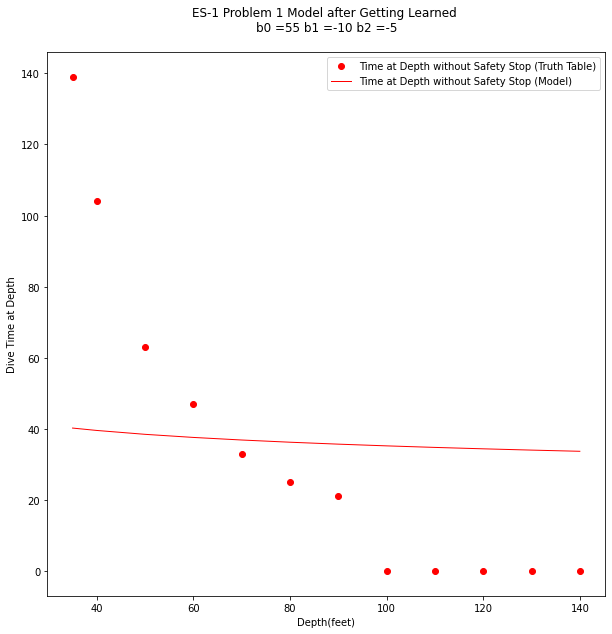

In [86]:
# empty vectors for simulations
seriesP1 = []
seriesP2 = []
# current model
for irow in range(len(dataframe1)):
    #seriesP1.append(timelin(dataframe1[irow][0],xbest[0],xbest[1],xbest[2]))
    seriesP2.append(timelog(dataframe1[irow][0],xbest[0],xbest[1],xbest[2]))
# plot data and models same graff
plottitle ='ES-1 Problem 1 Model after Getting Learned \n' + 'b0 =' + str(xbest[0]) + ' b1 =' + str(xbest[1]) + ' b2 =' + str(xbest[2]) + '\n' #+ ' b00 =' + str(b00) + ' b11 =' + str(b11) + ' b2 =' + str(b2) 
mydata = plt.figure(figsize = (10,10)) # build a square drawing canvass from figure class
#plt.plot(series1, series2, c='blue',linewidth=0,marker='o') 
#plt.plot(series1, seriesP1, c='blue',linewidth=1) 
plt.plot(series1, series3, c='red',linewidth=0,marker='o')
plt.plot(series1, seriesP2, c='red',linewidth=1)
plt.xlabel('Depth(feet)')
plt.ylabel('Dive Time at Depth')
plt.legend(['Time at Depth without Safety Stop (Truth Table)','Time at Depth without Safety Stop (Model)','Time at Depth without Safety Stop (Truth Table)','Time at Depth without Safety Stop (Model)'])
plt.title(plottitle)
plt.show()  

These two hypothesis models are crummy, even increasing the grid search area there is not much hope.  Now is where we humans shine, in postulating additional structures to try.  

To me (the author, Mr. Neko Kat) a hyperbolic model might do a better job (in two-parameter space) it looks something like

$$ \text{time} = (\frac{\beta_0}{\text{depth}})^\beta_1 $$

Simple enough to modify the scripts above to examine this hypothesis structure.

Search Complete - Error Value  1433.73713205
Combinations Examined :  7980
Beta 1  209
Beta 2  3


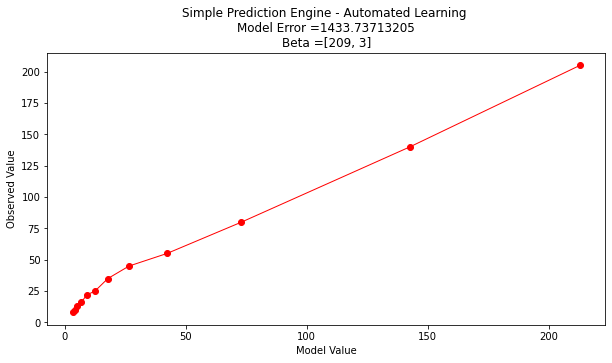

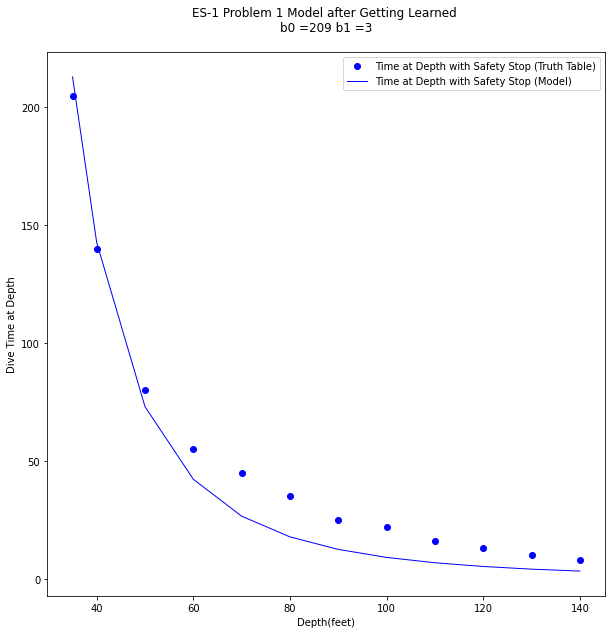

In [99]:
# identify, collect, load data
# Already did this 
# series1 is input
# series2 is response with safety stop
# series3 is response No safety stop

# a prediction engine structure 
def response(predictor1,beta1,beta2):
    #response = beta1 + beta2*predictor1
    response = (beta1/predictor1)**beta2 # we should raise exception for zero denominator
    return(response)
# a measure of model quality
def quality(observed_list,model_list): 
    if len(observed_list) != len(model_list):
        raise Exception("List lengths incompatable")
    sse = 0.0
    howmany=len(observed_list)
    for i in range(howmany):
        sse=sse + (observed_list[i]-model_list[i])**2
    return(sse)
# define search region - in this case a bit more elaborate than the notes

index_list1 = [i for i in range(1,400,1)] # index list is 1.0,2.0,....
index_list2 = [i for i in range(-10,10,1)] # index list is -10.0,-9.0,-8.0,....,9.0,10.0

#index_list1 = [i/10.0 for i in range(1,4000,1)] # index list is 1.0,2.0,....
#index_list2 = [i/10 for i in range(-10,100,1)] # index list is -10.0,-9.0,-8.0,....,9.0,10.0

# Now some python trickery so we can reuse code without much thinking

output = series2 # this is an equivalence statement, different names same object

howmany = 0 # keep count of how many combinations
error   = 1e99          # a big value, we are trying to drive this to zero
xbest   = [0,-10] # variables to store our best solution parameters
modeloutput = [0 for i in range(len(output))] # space to store model responses


# perform a search - here we use nested repetition
for i1 in index_list1:
    for i2 in index_list2:
        howmany=howmany+1 # keep count of how many times we learn
        beta1 = i1 # this is the intercept
        beta2 = i2 # this is the slope
        for irow in range(len(output)): 
            modeloutput[irow]=response(series1[irow],beta1,beta2)
        guess = quality(output,modeloutput) # current model quality
 #               print(guess)
        if guess <= error:
            error = guess
            xbest[0]= beta1
            xbest[1]= beta2
print("Search Complete - Error Value ",round(error,8))
print("Combinations Examined : ",howmany)
print("Beta 1 ",xbest[0])
print("Beta 2 ",xbest[1])
for irow in range(len(output)): 
    modeloutput[irow]=response(series1[irow],xbest[0],xbest[1])

# now the plot
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Simple Prediction Engine - Automated Learning \n'
plottitle = plottitle + 'Model Error =' + repr(round(error,8)) + '\n'
plottitle = plottitle + 'Beta =' + repr(xbest)
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(modeloutput, output, c='red',linewidth=1,marker='o') 
#plt.plot(input2, output, c='blue',linewidth=0,marker='o')
#plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Model Value')
plt.ylabel('Observed Value')
#plt.legend(['Predictor 1','Predictor 2'])
plt.title(plottitle)
plt.show()
# 
# empty vectors for simulations
seriesP1 = []
seriesP2 = []
# current model
for irow in range(len(dataframe1)):
    seriesP1.append(response(dataframe1[irow][0],xbest[0],xbest[1]))
    #seriesP2.append(timelog(dataframe1[irow][0],b00,b11,b2))
# plot data and models same graff
plottitle ='ES-1 Problem 1 Model after Getting Learned \n' + 'b0 =' + str(xbest[0]) + ' b1 =' + str(xbest[1]) + '\n' #+ ' b00 =' + str(b00) + ' b11 =' + str(b11) + ' b2 =' + str(b2) 
mydata = plt.figure(figsize = (10,10)) # build a square drawing canvass from figure class
plt.plot(series1, series2, c='blue',linewidth=0,marker='o') 
plt.plot(series1, seriesP1, c='blue',linewidth=1) 
#plt.plot(series1, series3, c='red',linewidth=0,marker='o')
#plt.plot(series1, seriesP2, c='red',linewidth=1)
plt.xlabel('Depth(feet)')
plt.ylabel('Dive Time at Depth')
plt.legend(['Time at Depth with Safety Stop (Truth Table)','Time at Depth with Safety Stop (Model)','Time at Depth without Safety Stop (Truth Table)','Time at Depth without Safety Stop (Model)'])
plt.title(plottitle)
plt.show()  

And now we are getting somewhere - in fact we could comfortable use this model because it errs to less time that is deemed safe. It might even work out for the no safety stop case.

---

## Problem 2

Build a simple classifier to determine a bug type based upon 1200 examples supplied in the file [bugs-train.csv](http://54.243.252.9/ce-5319-webroot/2-Exercises/ES-1/bugs-train.csv).

### Suggested Workflow:

1. Download the training file.  
2. Perform visual EDA by plotting the two feature variables on a scatterplot, assign the class variables two colors.
3. Decide if the two groups are seperable based on the EDA plot.
4. Mimicing the course notes construct a classifier that automatically finds a separation line in the feature space.
5. Test your classifier using [bugs-test.csv](http://54.243.252.9/ce-5319-webroot/2-Exercises/ES-1/bugs-test.csv).
6. Then challenge the classifier with the small challenge set [bugs-challenge.csv](http://54.243.252.9/ce-5319-webroot/2-Exercises/ES-1/bugs-challenge.csv) that does not contain the labels. 
7. Summarize your efforts into a brief blog-post type of report (i.e. in a Jupyter Notebook)